In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import scipy
from sklearn.linear_model import LogisticRegression, LinearRegression
import itertools
from sklearn.model_selection import KFold, train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, RocCurveDisplay
import seaborn as sns

%matplotlib inline

In [24]:
posgrado = pd.read_csv('data//grad.csv')
posgrado.head()

posgrado.columns[1]

'gre'

In [42]:
y = posgrado.iloc[:,:-posgrado.shape[1]+1]
X = posgrado.iloc[:,-posgrado.shape[1]+1:]

posgrado.describe().T


,count,mean,std,min,25%,50%,75%,max
admit,400.0,0.3175,0.466087,0.00,0.00,0.000,1.00,1.0
gre,400.0,587.7000,115.516536,220.00,520.00,580.000,660.00,800.0
gpa,400.0,3.3899,0.380567,2.26,3.13,3.395,3.67,4.0
rank,400.0,2.4850,0.944460,1.00,2.00,2.000,3.00,4.0


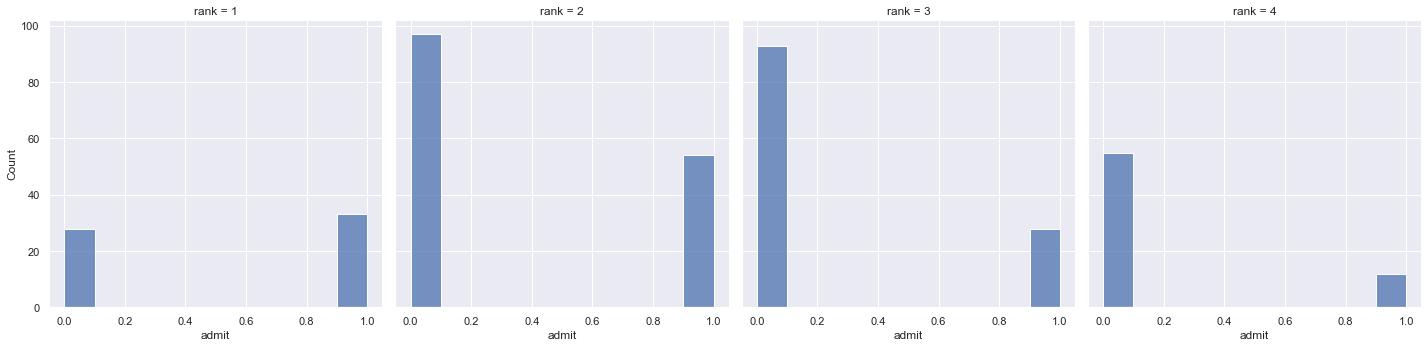

In [43]:
sns.set_theme(style='darkgrid')

sns.displot(posgrado, x='admit', col='rank');

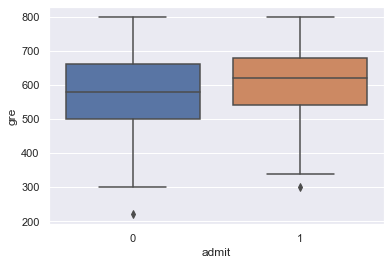

In [44]:
sns.boxplot(data=posgrado, x = "admit", y = "gre");

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                        train_size=0.3,
                                                        shuffle= True,
                                                        random_state=40)

### Creando modelo de regresion logistica y haciendo una validacion crusada 5 veces

In [46]:
n_folds = 5
random_seed = 50
kf = KFold(n_splits=n_folds, random_state=random_seed, shuffle=True)
accuracy, precision, recall, f1 = np.empty(n_folds), np.empty(n_folds), np.empty(n_folds), np.empty(n_folds)

X_train_cv = np.array(X_train)
y_train_cv = np.array(y_train)

for j, (train_index,test_index) in enumerate(kf.split(X_train_cv)):
    X_tr = X_train_cv[train_index]
    y_tr = y_train_cv[train_index]
    X_tst = X_train_cv[test_index]
    y_tst = y_train_cv[test_index]

    lr = LogisticRegression(max_iter=1000)
    lr.fit(X_tr, y_tr)

    #Test
    y_tst_hat = lr.predict(X_tst)

    precision[j]=precision_score(y_tst, y_tst_hat)
    recall[j]=recall_score(y_tst, y_tst_hat)
    accuracy[j]=accuracy_score(y_tst, y_tst_hat)
    f1[j] = f1_score(y_tst, y_tst_hat)

c:\Users\aochavez\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\aochavez\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\aochavez\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\aochavez\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

In [47]:
validation = pd.DataFrame({'Accuracy':accuracy, 'Precision': precision, 'Recall': recall})
validation

,Accuracy,Precision,Recall
0,0.708333,0.666667,0.250000
1,0.541667,0.428571,0.300000
2,0.791667,0.750000,0.428571
3,0.791667,0.666667,0.333333
4,0.875000,1.000000,0.400000


In [48]:
df_mod= pd.get_dummies(posgrado, columns = ['rank'], prefix=None)
df_mod.head(1)

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,380,3.61,0,0,1,0


In [49]:
X = df_mod.drop(['admit'], axis =1)
y = df_mod['admit']
X_train, X_test, y_train, y_test = train_test_split(X,y,shuffle=True,test_size=0.3,random_state=40)


In [50]:
n_folds = 5
random_seed = 50
kf = KFold(n_splits=n_folds, random_state=random_seed, shuffle=True)
accuracy, precision, recall, f1 = np.empty(n_folds), np.empty(n_folds), np.empty(n_folds), np.empty(n_folds)

X_train_cv = np.array(X_train)
y_train_cv = np.array(y_train)

for j, (train_index,test_index) in enumerate(kf.split(X_train_cv)):
    X_tr = X_train_cv[train_index]
    y_tr = y_train_cv[train_index]
    X_tst = X_train_cv[test_index]
    y_tst = y_train_cv[test_index]

    lr = LogisticRegression(max_iter=10000)
    lr.fit(X_tr, y_tr)

    #Test
    y_tst_hat = lr.predict(X_tst)

    precision[j]=precision_score(y_tst, y_tst_hat)
    recall[j]=recall_score(y_tst, y_tst_hat)
    accuracy[j]=accuracy_score(y_tst, y_tst_hat)
    f1[j] = f1_score(y_tst, y_tst_hat)

In [51]:
validation_mod = pd.DataFrame({'Accuracy':accuracy, 'Precision': precision, 'Recall': recall})
validation_mod

,Accuracy,Precision,Recall
0,0.607143,0.333333,0.047619
1,0.767857,1.000000,0.071429
2,0.750000,0.600000,0.200000
3,0.750000,0.333333,0.076923
4,0.660714,0.750000,0.142857


In [52]:
validation_mod.mean()

Accuracy     0.707143
Precision    0.603333
Recall       0.107766
dtype: float64

In [53]:
validation.mean()

Accuracy     0.741667
Precision    0.702381
Recall       0.342381
dtype: float64

In [57]:
X = posgrado.drop(['admit'], axis =1)
y = posgrado['admit']
X_train, X_test, y_train, y_test = train_test_split(X,y,shuffle=True,test_size=0.3,random_state=40)

In [58]:
model = LogisticRegression(max_iter=10000)
y_score = model.fit(X_train, y_train).predict_proba(X_test)

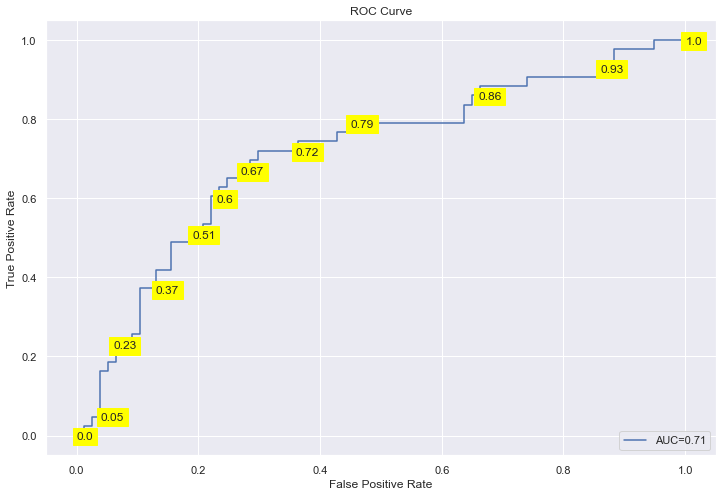

In [59]:
from sklearn import metrics
#define metrics
yhat = y_score[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, yhat)
auc = metrics.roc_auc_score(y_test, yhat)

#create ROC curve
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(fpr,tpr,label="AUC="+str(round(auc,2)))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
for index in range(0,len(fpr),5):
  ax.text(round(fpr[index],2), round(tpr[index],2), round(tpr[index],2), size=12, backgroundcolor='yellow', 
  verticalalignment='center_baseline')
plt.title('ROC Curve')
plt.legend(loc=4)
plt.show()

In [60]:
def roc_curve(ytest, probabilities):
  thresholds = np.linspace(0, 1, 50).tolist()
  yhat = probabilities[::,1]
  fpr, tpr, _ = metrics.roc_curve(ytest, yhat)
  return fpr, tpr, thresholds

In [62]:
df = pd.read_csv('data//loanf.csv')
df.head(5)

,Interest.Rate,FICO.Score,Loan.Length,Monthly.Income,Loan.Amount
6,15.31,670,36,4891.67,6000
11,19.72,670,36,3575.00,2000
12,14.27,665,36,4250.00,10625
13,21.67,670,60,14166.67,28000
21,21.98,665,36,6666.67,22000


In [63]:
df["Approve"] = np.where(df["Interest.Rate"] < 12, 1, 0)
df.head()

,Interest.Rate,FICO.Score,Loan.Length,Monthly.Income,Loan.Amount,Approve
6,15.31,670,36,4891.67,6000,0
11,19.72,670,36,3575.00,2000,0
12,14.27,665,36,4250.00,10625,0
13,21.67,670,60,14166.67,28000,0
21,21.98,665,36,6666.67,22000,0


In [64]:
X = df[['FICO.Score', 'Loan.Length', 'Loan.Amount']]
y = df['Approve']
X_train, X_test, y_train, y_test = train_test_split(X,y,shuffle=True,test_size=0.3,random_state=40)

In [65]:
model = LogisticRegression()
model.fit(X_train, y_train)
probs = model.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(probabilities=probs, ytest = y_test)

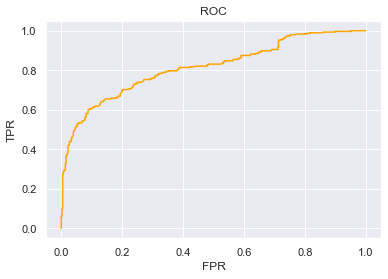

In [67]:
plt.plot(fpr,tpr, color='orange')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show()

In [68]:
yhat.mean()

0.31163222767075366